In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

cid = '5835805e22a345948373bd954162324c'
secret = '825844fb5de94f0986519911292d4e41'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = sp.Spotify(client_credentials_manager=client_credentials_manager)


PLAYLIST_LINK = "https://open.spotify.com/playlist/3duYTnAmkLjes0saqaQW1h?si=c7028855187d4c85"
# playlist_URI = PLAYLIST_LINK.split("/")[-1].split("?")[0]

In [5]:
def get_playlist_uri(PLAYLIST_LINK):
    return PLAYLIST_LINK.split("/")[-1].split("?")[0]


# def get_tracks(offset=0):
#     tracks = []
#     #playlist_tracks(playlist_id, fields=None, limit=100, offset=0, market=None)
#     playlist_uri = get_playlist_uri(PLAYLIST_LINK)
#     for track in sp.playlist_tracks(playlist_uri,  offset=offset)["items"]:
#         track_uri = track["track"]["uri"]
#         track_name = track["track"]["name"]
#         track_data = sp.audio_features(track_uri)[0]
#         track_data['track_name'] = track_name
#         # print(track_data)
#         track_data = dict(reversed(list(track_data.items())))
#         # result = track_name, audio_features
#         tracks.append(track_data)

#     return tracks



def get_tracks(offset=0):
    tracks = []
    #playlist_tracks(playlist_id, fields=None, limit=100, offset=0, market=None)
    playlist_uri = get_playlist_uri(PLAYLIST_LINK)
    track_uri_ls = []
    track_name_ls = []
    for track in sp.playlist_tracks(playlist_uri,  offset=offset)["items"]:
        track_uri = track["track"]["uri"]
        track_name = track["track"]["name"]
        track_uri_ls += [track_uri]
        track_name_ls += [track_name]
    return track_uri_ls, track_name_ls

In [6]:
track_uri_ls, track_name_ls = get_tracks(0)
track_uri_ls

['spotify:track:4kMiekbEHmPfwvGpAWsery',
 'spotify:track:4dUaNgt7yz800njfPPBCKG',
 'spotify:track:6pPDsvcENKpodvKJVEk8bu',
 'spotify:track:1NpEwuKvVGfTbFFv15OPi7',
 'spotify:track:4XUuneNvpC17ShYbx17siV',
 'spotify:track:59uLieAJYECnW1jjQu1KvI',
 'spotify:track:1QxgYM8W8yZDqYStTvocG5',
 'spotify:track:2fleoFrkdAAEaYkvtvWiCJ',
 'spotify:track:40uBWQQFPHH2mYkmSLjGmP',
 'spotify:track:0JueG6VQgsYiPASAFdemVd',
 'spotify:track:4otuKBrl3cfof2vhPUjyIQ',
 'spotify:track:6XVacMFTtTSdIECs5oVGFn',
 'spotify:track:2R9odNmMC71i4y6s3Xu2f0',
 'spotify:track:4CKZBKNrTUGWpgpuhParZR',
 'spotify:track:03xxBUGg6hzIYo4AdA3BhI',
 'spotify:track:2F9W7CgWowlWJy0JBLKBQa',
 'spotify:track:2EwRppyziQROuR9Bhphjbf',
 'spotify:track:0tsfxijIN0Ujfbtji7gofr',
 'spotify:track:5lTt1poh7jkN2wSBp4H6dx',
 'spotify:track:2PIIDPboG9Wzn3vu84uSlk',
 'spotify:track:78gPbrbL9zVZkVZF56bT8u',
 'spotify:track:0vCKJaM7wjZez0RTYZgSQy',
 'spotify:track:6nptk6LSX6Z1e8NnRfPvlA',
 'spotify:track:3xpibUQRbd0gyNasEZ7VtA',
 'spotify:track:

In [9]:
sp.audio_features(track_uri_ls[0])

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=4kMiekbEHmPfwvGpAWsery:
 Max Retries, reason: too many 429 error responses

In [4]:
playlist_data = []
for i in range(3):
    offset = i*100
    print(offset)
    playlist_data += get_tracks(offset=offset)

0


Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=4kMiekbEHmPfwvGpAWsery:
 Max Retries, reason: too many 429 error responses

In [69]:
playlist_df = pd.DataFrame(playlist_data)

In [72]:
playlist_df.mean(numeric_only=True)

time_signature           3.985075
duration_ms         373970.996269
tempo                  120.709254
valence                  0.412573
liveness                 0.140440
instrumentalness         0.775123
acousticness             0.035642
speechiness              0.057632
mode                     0.686567
loudness                -8.192713
key                      5.555970
energy                   0.736918
danceability             0.754843
dtype: float64

In [95]:
playlist_df[playlist_df.loudness==playlist_df.loudness.max()]

,track_name,time_signature,duration_ms,analysis_url,track_href,uri,id,type,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
183,Analogical Past - Rigopolar Remix,4,393391,https://api.spotify.com/v1/audio-analysis/6Ppv...,https://api.spotify.com/v1/tracks/6PpvreCRR2sZ...,spotify:track:6PpvreCRR2sZrqyIGJT0tT,6PpvreCRR2sZrqyIGJT0tT,audio_features,105.0,0.725,0.0633,0.92,0.186,0.0783,1,-3.228,2,0.956,0.802


<Axes: >

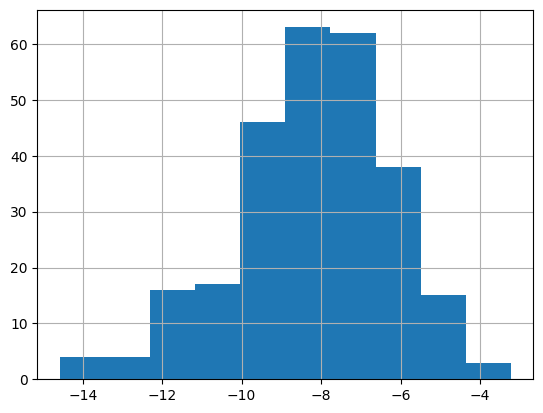

In [93]:
playlist_df['loudness'].hist()

In [ ]:

scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(fit_data)
features_normal = pd.DataFrame(features_normal)
features_normal.columns = fit_data.columns

In [96]:
# playlist_link = "https://open.spotify.com/playlist/3duYTnAmkLjes0saqaQW1h?si=c7028855187d4c85"
# playlist_URI = playlist_link.split("/")[-1].split("?")[0]
# track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

# # playlist_tracks(playlist_id, fields=None, limit=100, offset=0, market=None)

# for track in sp.playlist_tracks(playlist_URI)["items"]:
#     #URI
#     track_uri = track["track"]["uri"]
    
#     #Track name
#     track_name = track["track"]["name"]
    
#     #Main Artist
#     artist_uri = track["track"]["artists"][0]["uri"]
#     artist_info = sp.artist(artist_uri)
    
#     #Name, popularity, genre
#     artist_name = track["track"]["artists"][0]["name"]
#     artist_pop = artist_info["popularity"]
#     artist_genres = artist_info["genres"]
    
#     #Album
#     album = track["track"]["album"]["name"]
    
#     #Popularity of the track
#     track_pop = track["track"]["popularity"]

In [15]:
sp.playlist_tracks(playlist_URI)["items"]

[{'added_at': '2023-12-01T12:30:38Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/jdvenegas'},
   'href': 'https://api.spotify.com/v1/users/jdvenegas',
   'id': 'jdvenegas',
   'type': 'user',
   'uri': 'spotify:user:jdvenegas'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3sZkCrbHsAo7OS6CuB7F6Q'},
      'href': 'https://api.spotify.com/v1/artists/3sZkCrbHsAo7OS6CuB7F6Q',
      'id': '3sZkCrbHsAo7OS6CuB7F6Q',
      'name': 'Cabizbajo',
      'type': 'artist',
      'uri': 'spotify:artist:3sZkCrbHsAo7OS6CuB7F6Q'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     

In [4]:
# sp.audio_features(track_uri)
playlist_URI

'3duYTnAmkLjes0saqaQW1h'

In [9]:
# import tekore as tk
# redirect_uri = 'http://localhost:5173'
# conf = (cid, secret, redirect_uri)

# # tk.scope.read: Scope = tk.scope.user_library_read        
# token = tk.prompt_for_user_token(*conf, scope=tk.scope.user_library_read)

# spotify = tk.Spotify(token)
# # tracks = spotify.current_user_top_tracks(limit=10)
# # spotify.playback_start_tracks([t.id for t in tracks.items])

# items = spotify.playlist_items(playlist_URI, limit=25)
# t_next = spotify.next(items)
# t_prev = spotify.previous(t_next)